##### Fear greed index (Market sentiment)

1. **timestamp**: Time                                                           
2. **value**: A numeric score (0–100) showing market sentiment: lower = fear, higher= greed.                                            
3. **classification**:Categorical label based on `value`. Common classes: **Extreme Fear**, **Fear**, **Neutral**, **Greed**, **Extreme Greed**
4. **date**: date format (YYYY-MM-DD) 

##### Historical data

1.  **Account**: Unique identifier for a trader (like an account ID)                       
2. **Coin**: The trading symbol.
3. **Execution Price**: Price at which the trade was executed.                                   
4. **Size Tokens**: Amount of crypto tokens traded.                                                      
5. **Size USD**: Trade size in USD.                            
6.  **Side**: Trade type: **BUY** or **SELL**.                                                     
7. **Timestamp IST**: Date and time of trade in Indian Standard Time (e.g., `02-12-2024 22:50`)
8. **Start Position**: The trader’s position size before this trade.               
9. **Direction**: Similar to **Side**. Whether the trade was a **Buy** or **Sell** action.             
10. **Closed**: 0 means the trade is open; 1 means it’s closed.
11. **Transaction Hash**: A Transaction Hash is a unique identifier for a blockchain transaction. Like a receipt
12. **Order ID**: Internal ID for the trade order.                                                     
13. **Crossed**: TRUE means the order was filled instantly by matching another order.                 
14. **Fee**: Trading fee paid for the transaction.                                                
15. **Trade ID**: Another unique identifier for the trade.                                             
16. **Timestamp**:  time when the trade occurred

                                                               


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the datasets
fear_greed = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

In [3]:
fear_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


### Convert timestamp to date time

In [5]:
# Convert timestamp to datetime in fear_greed
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

# Convert timestamp in trades
trades['date'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
trades['date'] = pd.to_datetime(trades['date'])


### Aggregate trader data by day

In [6]:
daily_summary = trades.groupby('date').agg({
    'Size USD': 'sum',
    'Fee': 'sum',
    'Account': pd.Series.nunique,
    'Execution Price': 'mean',
    'Direction': lambda x: x.value_counts().to_dict(),
    'Order ID': 'count'
}).reset_index()

daily_summary.columns = ['date', 'total_volume_usd', 'total_fee', 'unique_accounts', 'avg_price', 'direction_counts', 'num_trades']


##### We are aggregatimg trader data because the fear_greed_index gives one sentiment value per day. To compare sentiment with trading behavior, our trade data should also be daily.

### Merge both the datasets

In [7]:
merged_df = pd.merge(daily_summary, fear_greed[['date', 'classification', 'value']], on='date', how='left')


In [8]:
merged_df.head()

,date,total_volume_usd,total_fee,unique_accounts,avg_price,direction_counts,num_trades,classification,value
0,2023-05-01,477.00,0.000000,1,1898.133333,{'Open Long': 3},3,Greed,63.0
1,2023-12-05,50005.83,12.501455,1,11038.300000,"{'Open Long': 7, 'Open Short': 2}",9,Extreme Greed,75.0
2,2023-12-14,113203.35,28.300831,1,8031.868818,"{'Close Long': 4, 'Open Long': 3, 'Close Short...",11,Greed,72.0
3,2023-12-15,10609.95,2.652489,1,2.982000,{'Close Short': 2},2,Greed,70.0
4,2023-12-16,15348.77,3.837189,1,0.384707,{'Open Long': 3},3,Greed,67.0


### Visualization

##### Trades per sentiment classification

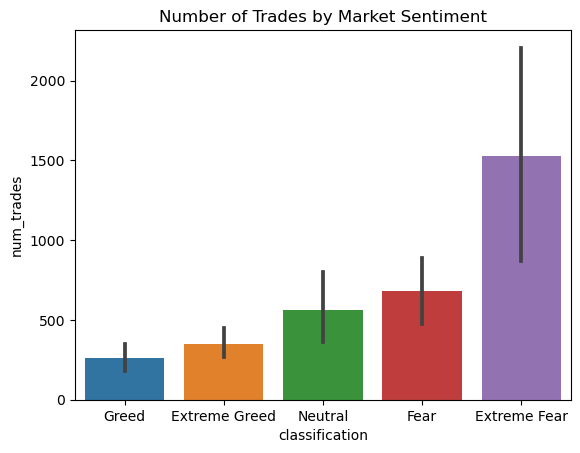

In [10]:
sns.barplot(data=merged_df, x='classification', y='num_trades')
plt.title("Number of Trades by Market Sentiment")
plt.show()

##### Highest trading activity occurs during Extreme Fear possibly due to panic selling  or volatility-driven trade. Lowest trading during Greed and Extreme Greed possibly because traders are holding positions expecting price growth.
##### The graph suggests a strong relationship between market fear and increased trading activity, possibly due to higher volatility, uncertainty, or defensive strategies. In contrast, greedy markets are calmer with fewer trades, perhaps due to trader optimism and holding behavior.

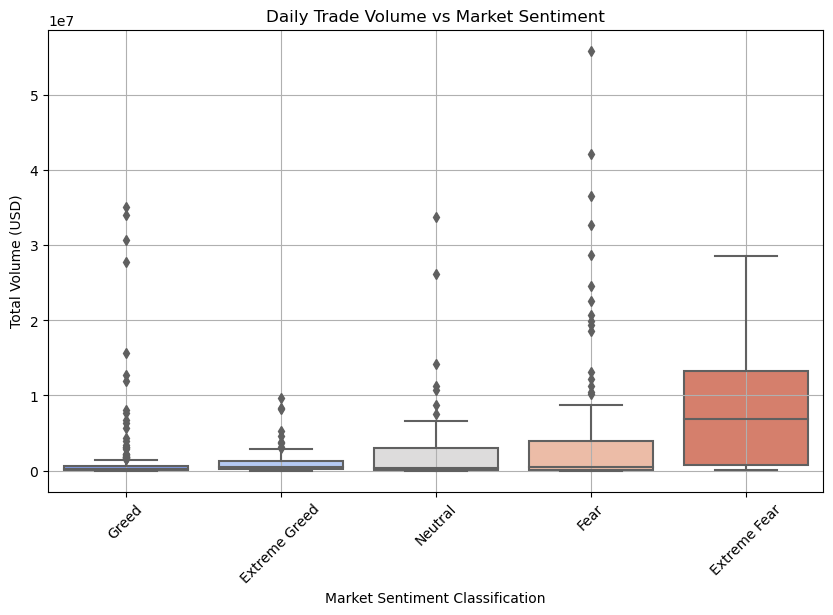

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='total_volume_usd', palette='coolwarm')
plt.title('Daily Trade Volume vs Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.xlabel('Market Sentiment Classification')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### Box height (IQR): Spread of the middle 50% of daily volumes. Middle line: Median daily volume. Dots above whiskers: Outliers — days with exceptionally high volume.
##### Volume Increases as Fear Rises. The median volume (thick line inside the box) is lowest for Greed and highest for Extreme Fear. This suggests traders trade more when the market is fearful, especially in extreme panic conditions.





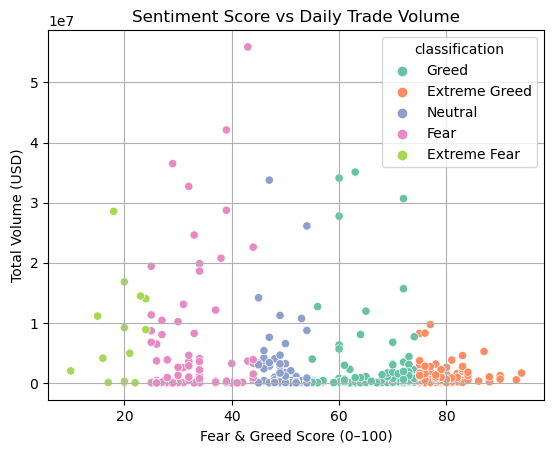

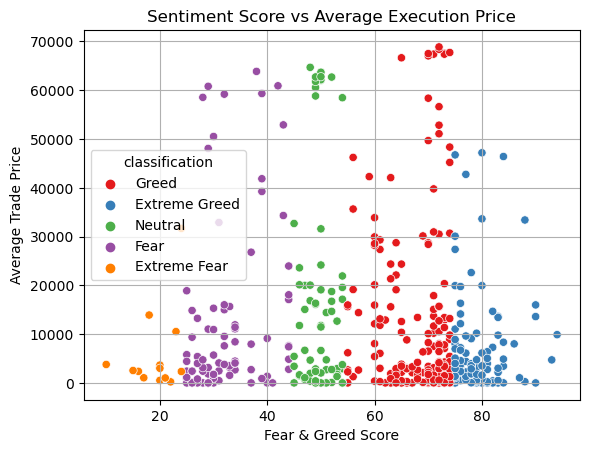

In [15]:
# Scatter plot for volume vs sentiment score
sns.scatterplot(data=merged_df, x='value', y='total_volume_usd', hue='classification', palette='Set2')
plt.title('Sentiment Score vs Daily Trade Volume')
plt.xlabel('Fear & Greed Score (0–100)')
plt.ylabel('Total Volume (USD)')
plt.grid(True)
plt.show()

# Scatter plot for price vs sentiment score
sns.scatterplot(data=merged_df, x='value', y='avg_price', hue='classification', palette='Set1')
plt.title('Sentiment Score vs Average Execution Price')
plt.xlabel('Fear & Greed Score')
plt.ylabel('Average Trade Price')
plt.grid(True)
plt.show()


##### Graph 1 This graph reveals a clear negative correlation between market optimism (sentiment score) and trading volume. Lower sentiment scores (fear) lead to increased trading, possibly due to panic selling, market rebalancing, or speculative opportunities during volatility. Meanwhile, greedier markets are quieter, with lower trade volumes and more passive strategies.

##### Graph 2  Strong Positive Correlation Between Sentiment and Price. As the sentiment score increases, the average execution price also increases. This indicates that: Market prices rise when sentiment is optimistic (Greed), and prices drop when sentiment is pessimistic (Fear). In greedy markets, demand is high → prices go up. In fearful markets, people sell → prices drop.

##### Summary

##### Extreme Fear → High Volume--> Low Prices, When sentiment is in Extreme Fear-->Prices are lowest, Trader participation and volume are highest, indicating panic-selling and volatility.
##### Greed → High Prices, Low Volume-->When sentiment is in Greed, prices are highest-->Fewer traders participate —holding, not trading

##### Recommendation

##### Buy during "Extreme Fear" — sell during "Greed".